In [99]:
import pandas as pd

caseName = 'SetTimeout'

In [100]:
directCalls = pd.read_csv('transitiveUsage/directCalls{}.csv'.format(caseName))
indirectCalls = pd.read_csv('transitiveUsage/indirectCalls{}.csv'.format(caseName))

layeredReach = pd.read_json('transitiveUsage/layeredReach{}.json'.format(caseName), typ='series')

layer1 = layeredReach[1]
layer2 = layeredReach[2] + layeredReach[1]

totalReach = layeredReach.sum()

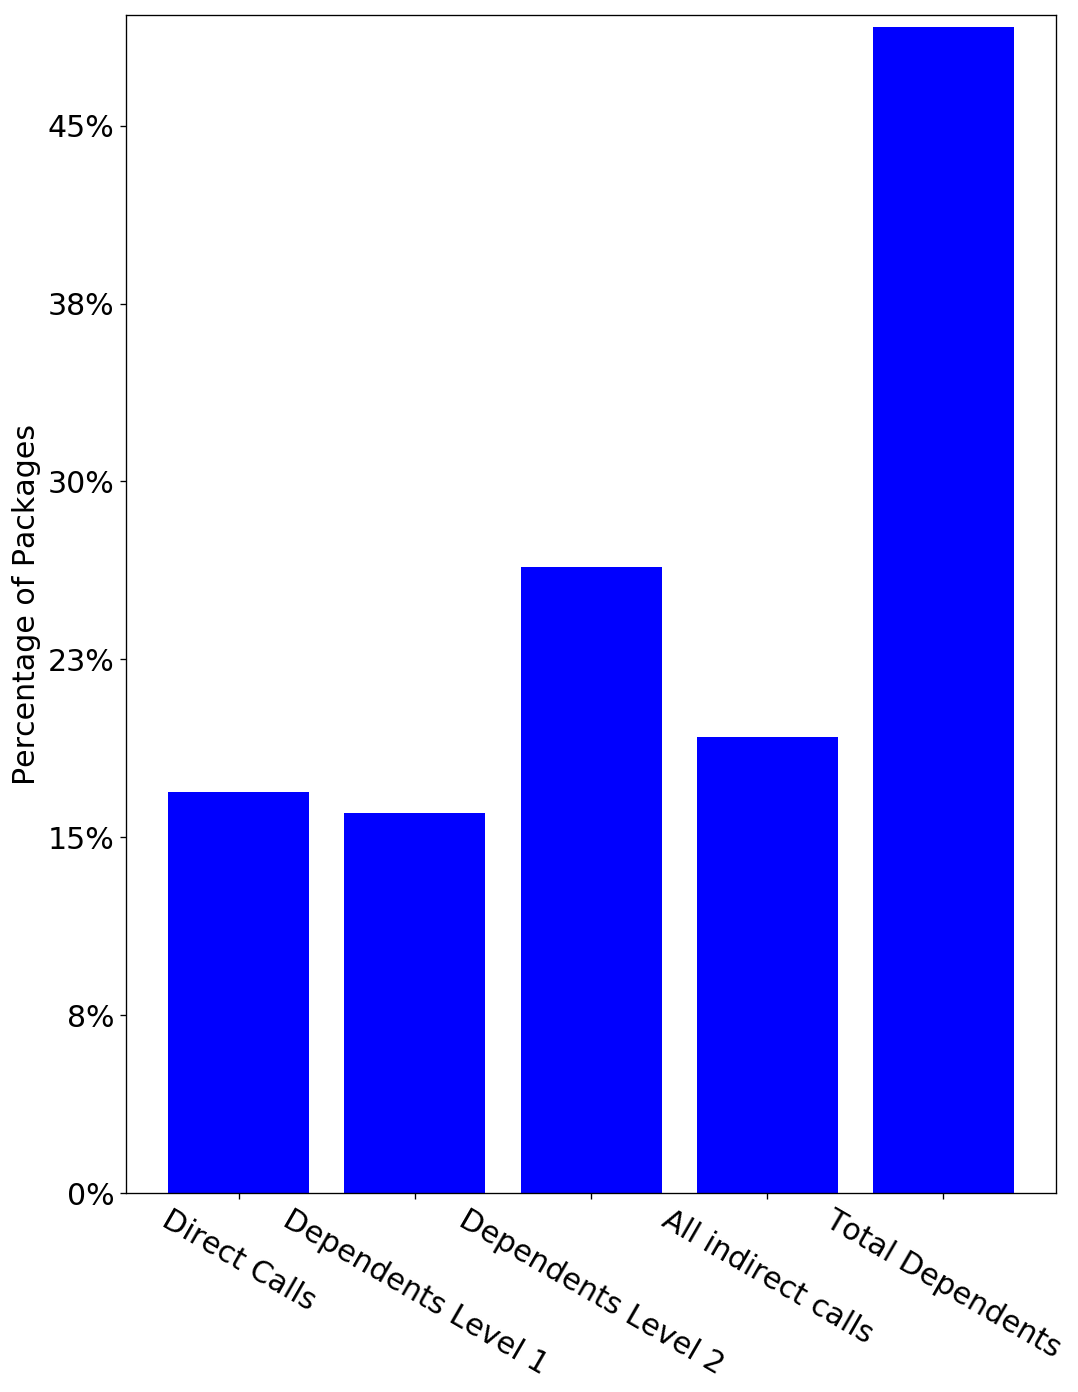

In [101]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

def calculatePercentage(x):
    return np.ceil(x/667224*100)

Y = [len(directCalls), layer1, layer2, len(indirectCalls), totalReach]
X = np.arange(0, len(Y), step=1)

plt.figure(figsize=(10,13), dpi=120)
plt.bar(X, Y, color="blue")

# for x,y in zip(X,Y):
#     plt.text(x, y,'{:.2f}%'.format(y/667224*100), ha='center', va= 'bottom')

plt.ylabel('Percentage of Packages')
plt.ylim(0, np.max(Y) + 667224/100/2)
plt.gca().set_yticklabels(['{:.0f}%'.format(calculatePercentage(x)) for x in plt.gca().get_yticks()]) 
plt.xticks(np.arange(0, len(Y), step=1), ['Direct Calls', 'Dependents Level 1', 'Dependents Level 2', 'All indirect calls', "Total Dependents"], rotation=-30)

plt.savefig('transitiveUsage/{}.png'.format(caseName))
plt.show()
